# <a id='1'> Let's import our Libraries </a>

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [2]:
import warnings
warnings.filterwarnings("ignore")

C:\Users\Maxie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# <a id='1'> Let's read our csv dataset </a>

In [3]:
df_train = pd.read_csv(r"lead_qualification_history.csv", sep=',',encoding= 'unicode_escape') 
pd.set_option('display.max_columns', None)

In [4]:
df_test = pd.read_csv("lead_qualification_PredictMe.csv", sep=',',encoding= 'unicode_escape') 
pd.set_option('display.max_columns', None)

In [5]:
df_train.head()

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus
0,9,No,Manager,0.47,8700,Internet,No,SE Asia,None,yes
1,8,Yes,Executive,0.35,10300,Internet,No,Europe,Trial,no
2,8,Yes,Executive,0.17,6000,Phone,No,Other,Digital|Traditional|Trial,yes
3,2,No,Manager,0.23,15200,Walkin,Yes,Americas,None,no
4,4,Yes,Other,0.34,8400,Phone,No,Other,Digital|Trial,yes


In [6]:
df_test.head()

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus
0,9,No,Manager,0.47,8700,Internet,No,SE Asia,None,NaN
1,8,Yes,Executive,0.35,10300,Internet,No,Europe,Trial,NaN
2,8,Yes,Executive,0.17,6000,Phone,No,Other,Digital|Traditional|Trial,NaN
3,2,No,Manager,0.23,15200,Walkin,Yes,Americas,None,NaN
4,4,Yes,Other,0.34,8400,Phone,No,Other,Digital|Trial,NaN


# <a id='1'> EDA - Exploratory Data Analysis </a>

In [7]:
# df_train.describe()

In [8]:
print("Q: Are there any missing values?", "\n" +
      "A: {}".format(df_train.isnull().values.any()))

Q: Are there any missing values? 
A: False


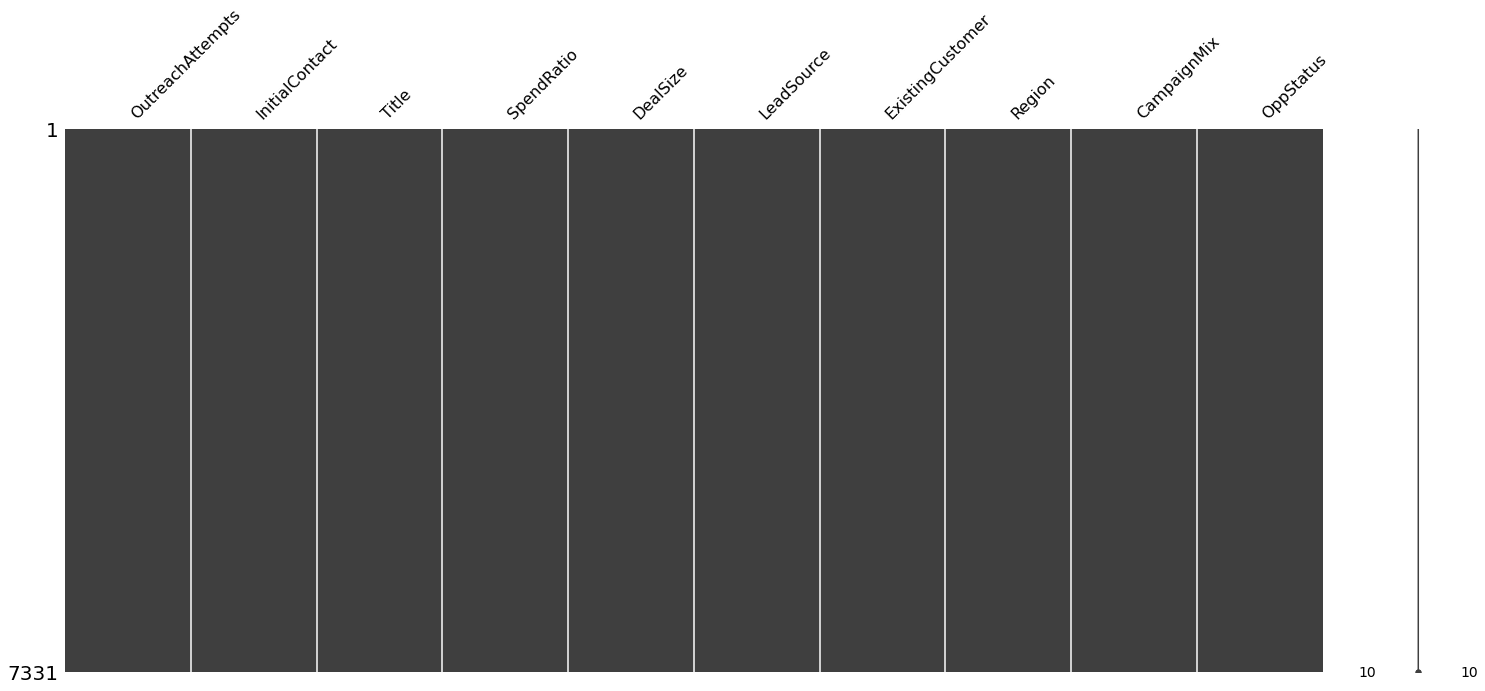

In [9]:
import missingno as msno  # to visually check missing numbers/values.
msno.matrix(df_train);

In [10]:
print ("Rows     : " ,df_train.shape[0])
print ("Columns  : " , format(df_train.shape[1])+"\n")
print ("Features : \n" , format(df_train.columns.tolist())+"\n\n")
print ("Missing values :  ", format(df_train.isnull().sum().values.sum())+"\n\n")
print ("Unique values :\n \n{}% ".format(df_train.nunique()))

Rows     :  7331
Columns  :  10

Features : 
 ['OutreachAttempts', 'InitialContact', 'Title', 'SpendRatio', 'DealSize', 'LeadSource', 'ExistingCustomer', 'Region', 'CampaignMix', 'OppStatus']


Missing values :   0


Unique values :
 
OutreachAttempts      9
InitialContact        2
Title                 3
SpendRatio           58
DealSize            111
LeadSource            4
ExistingCustomer      2
Region                5
CampaignMix           8
OppStatus             2
dtype: int64% 


In [11]:
for name in df_train.columns:
    print(name)
    print(df_train[name].unique())
    print( )

OutreachAttempts
[ 9  8  2  4  6  5  3  7 10]

InitialContact
['No' 'Yes']

Title
['Manager' 'Executive' 'Other']

SpendRatio
[0.47 0.35 0.17 0.23 0.34 0.36 0.15 0.6  0.53 0.22 0.56 0.25 0.21 0.44
 0.42 0.32 0.12 0.33 0.45 0.31 0.54 0.58 0.26 0.38 0.37 0.28 0.13 0.27
 0.4  0.29 0.2  0.06 0.43 0.41 0.59 0.48 0.16 0.19 0.05 0.46 0.62 0.14
 0.51 0.55 0.24 0.5  0.1  0.3  0.39 0.18 0.49 0.52 0.11 0.61 0.07 0.08
 0.09 0.57]

DealSize
[ 8700 10300  6000 15200  8400  6100  7600  9200 10500  6900 14400 15000
 11300 11000 11700 15700  8000  5000 10100 14800 15600 10200  8500  6300
 14000  7300 15300  6800  8100  9700 13100 14300  9500 12400 14500 11500
  7200  7800 14900 12200 11900  7000  8600 10800  8800 12100  5900 14100
  7700 15500 13400 11800  8900 12500 12900 14200  5300 14700  6200 12800
  5600 10400  6500  5200  9400 11600 10600  9800 15400 10000  7500 12000
 12300  9100 13500  9600 13800 14600 12700 11200 11100 13700  7400 10700
 13900  5700 13200  7900 16000 13300  8200  9000  9300  7

In [12]:
for name in df_train.columns:
    print(name)
    print(df_train[name].value_counts())
    print( )

OutreachAttempts
9     997
5     992
6     982
7     970
4     942
8     937
2     580
3     534
10    397
Name: OutreachAttempts, dtype: int64

InitialContact
No     3849
Yes    3482
Name: InitialContact, dtype: int64

Title
Executive    2709
Manager      2650
Other        1972
Name: Title, dtype: int64

SpendRatio
0.52    172
0.50    171
0.25    163
0.22    161
0.45    160
0.34    159
0.44    158
0.54    156
0.35    156
0.32    156
0.53    154
0.51    154
0.20    154
0.23    150
0.21    149
0.15    148
0.16    147
0.49    145
0.27    144
0.18    143
0.17    143
0.19    141
0.14    140
0.13    140
0.33    140
0.31    140
0.37    138
0.48    138
0.36    138
0.38    138
0.43    135
0.41    135
0.47    135
0.28    133
0.40    133
0.42    133
0.24    131
0.26    130
0.12    130
0.39    129
0.30    124
0.55    122
0.29    120
0.46    117
0.60    107
0.62     98
0.58     94
0.61     90
0.56     84
0.57     78
0.59     76
0.09     64
0.08     62
0.10     60
0.06     58
0.05     54
0.11     5

In [13]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
OutreachAttempts,7331.0,6.085254,2.301779,2.00,4.00,6.00,8.00,10.00
SpendRatio,7331.0,0.343975,0.152250,0.05,0.21,0.34,0.48,0.62
DealSize,7331.0,10617.514664,2950.506491,5000.00,8100.00,10600.00,13200.00,16000.00


In [14]:
df_train.sample(5)

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus
5954,4,No,Other,0.57,13900,Internet,No,Americas,None,no
4278,4,Yes,Other,0.40,12300,Phone,No,Europe,Digital|Trial,yes
330,10,Yes,Manager,0.21,14000,Other,Yes,Americas,Traditional|Trial,yes
6130,8,No,Other,0.51,11900,Phone,No,Europe,None,no
4422,4,Yes,Other,0.18,9800,Internet,No,Australia,Trial,yes


## Lets change the separating bar(|) in CampaignMix to comma(,)

In [15]:
def grep_year(x):
    x = x.replace("|", ",")
    return x

In [16]:
df_train['CampaignMix'] = df_train['CampaignMix'].apply(grep_year)
df_test['CampaignMix'] = df_test['CampaignMix'].apply(grep_year)

In [17]:
df_train.sample(5)

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus
5788,4,No,Executive,0.38,11300,Walkin,Yes,Australia,None,no
1949,4,Yes,Manager,0.51,10800,Other,No,Australia,None,no
984,4,Yes,Executive,0.22,8200,Walkin,Yes,Australia,"Digital,Trial",yes
2375,9,No,Other,0.26,13500,Internet,Yes,Europe,None,no
2793,2,Yes,Executive,0.12,11100,Internet,No,SE Asia,None,no


In [18]:
df_test.sample(5)

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus
2972,4,Yes,Manager,0.55,5300,Other,Yes,Americas,Digital,NaN
4815,3,No,Executive,0.50,10900,Walkin,No,Europe,None,NaN
5385,5,Yes,Other,0.62,14900,Internet,Yes,Australia,None,NaN
105,4,No,Other,0.18,12900,Phone,Yes,Europe,None,NaN
2883,2,Yes,Other,0.42,6500,Walkin,Yes,Europe,None,NaN


In [19]:
df_train.DealSize.describe()

count     7331.000000
mean     10617.514664
std       2950.506491
min       5000.000000
25%       8100.000000
50%      10600.000000
75%      13200.000000
max      16000.000000
Name: DealSize, dtype: float64

# <a id='1'> Data Visualization </a>

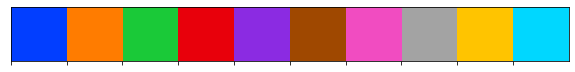

In [20]:
color_palette = sns.color_palette("bright", 10)
sns.palplot(color_palette)

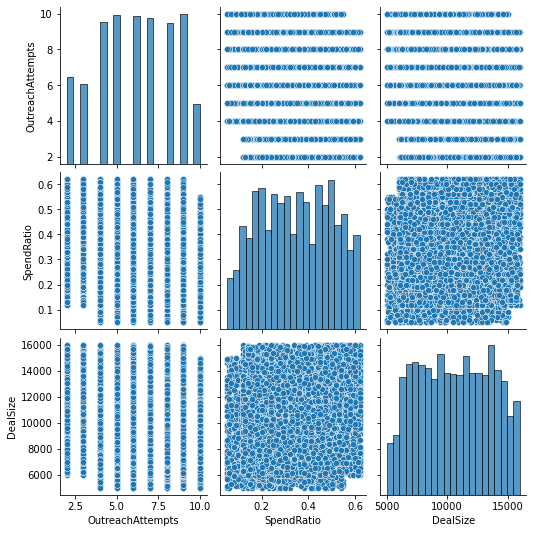

In [21]:
#this is the pairplot before conversion of the categorical features from yes or no to 1 and 0
sns.pairplot(df_train)

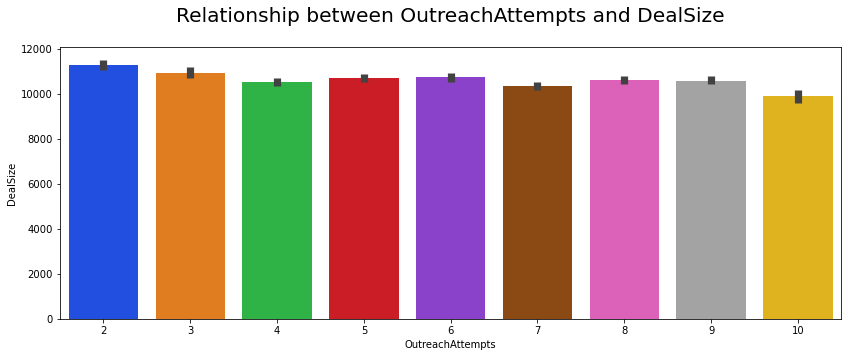

In [22]:
#This was to check the relationship between outreachattempts and dealsize
fig, ax = plt.subplots(figsize=(14,5))
plt.style.use('fivethirtyeight')

barplot = sns.barplot(df_train['OutreachAttempts'], df_train['DealSize'], palette='bright', ax=ax) 
barplot.set_title('Relationship between OutreachAttempts and DealSize', pad=25);

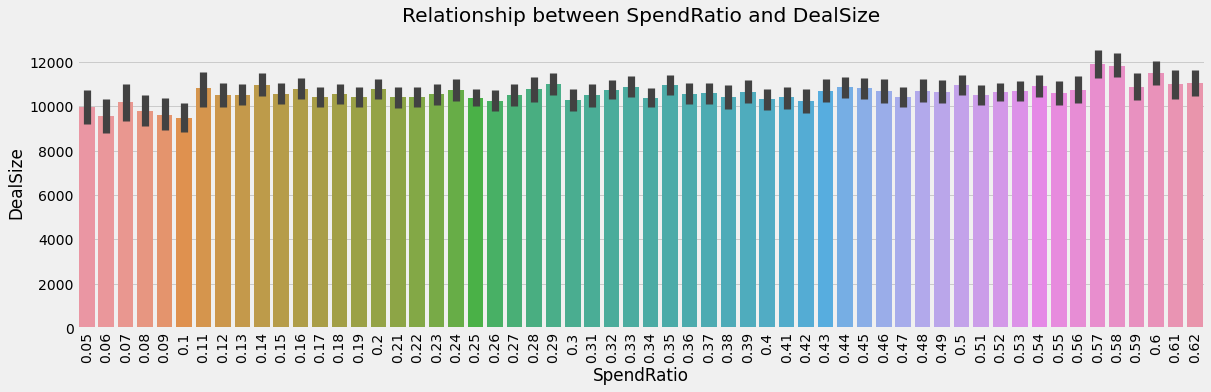

In [23]:
#This was to check the relationship between spendratio and dealsize
fig, ax = plt.subplots(figsize=(18,5))
plt.style.use('fivethirtyeight')

barplot = sns.barplot(df_train['SpendRatio'], df_train['DealSize'], ax=ax) 
barplot.set_title('Relationship between SpendRatio and DealSize', pad=15)
plt.xticks(rotation = 90);

In [24]:
# function to put DealSize into a grouping range.
def Deal_Size(df_train):
    
    if df_train['DealSize'] <= 5000:
        return "DealSize_0-5000"
    elif (df_train['DealSize'] > 5000) & (df_train['DealSize'] <= 10000):
        return "DealSize_5000-10000"
    elif (df_train['DealSize'] > 10000) & (df_train['DealSize'] <= 15000):
        return "DealSize_10000-15000"
    elif df_train['DealSize'] > 15000:
        return "DealSize_above_15000"
df_train["DealSize_group"] = df_train.apply(lambda df_train: Deal_Size(df_train),
                                      axis = 1)

# Separating opportunity and no opportunity status.
yes_OppStatus = df_train[df_train["OppStatus"] == "yes"]
print("The shape of the OppStatus, which is YES only: ", yes_OppStatus.shape)

no_OppStatus = df_train[df_train["OppStatus"] == "no"]
print("The shape of the OppStatus, which is NO only: ", no_OppStatus.shape)

#Separating catagorical and numerical columns
target_col = ["OppStatus"]
cat_cols   = df_train.nunique()[df_train.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in df_train.columns if x not in cat_cols + target_col]

The shape of the OppStatus, which is YES only:  (2749, 11)
The shape of the OppStatus, which is NO only:  (4582, 11)


# Opportunity Status 

In [25]:
#labels
lab = df_train['OppStatus'].value_counts().keys().tolist()
#values
val = df_train['OppStatus'].value_counts().values.tolist()

trace = go.Pie(labels = lab,
               values = val,
               marker = dict(colors = ['royalblue', 'lime'],
                            line= dict(color = "white",
                                       width = 1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title= "Opportunity Status",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)", 
                       )
                  )

data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

# Opportunity Status versus The Variable distribution/Various columns

In [26]:
#function  for pie plot for opportunity status types
def plot_pie(column) :
    
    
    trace1 = go.Pie(values  = yes_OppStatus[column].value_counts().values.tolist(),
                    labels  = yes_OppStatus[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0, .48]),
                    name    = "Opportunity status",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = no_OppStatus[column].value_counts().values.tolist(),
                    labels  = no_OppStatus[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52, 1]),
                    hole    = .6,
                    name    = "No opportunity status" 
                   )
    
    layout = go.Layout(dict(title = column + " distribution of opportunity status ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Opportunity status",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "No Opportunity status",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88, y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

    
#function  for histogram for Opportunity status types
def histogram(column) :
    trace1 = go.Histogram(x  = yes_OppStatus[column],
                          histnorm= "percent",
                          name = "Opportunity status",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = no_OppStatus[column],
                          histnorm = "percent",
                          name = "No opportunity status",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution of opportunity status ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)   

    
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df_train)  :
    
    df_train  = df_train.sort_values(by = "OppStatus", ascending = True)
    classes = df_train["OppStatus"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df_train["OppStatus"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df_train.loc[k,"OppStatus"] for k in range(len(df_train))]
    text

    trace = go.Splom(dimensions = [dict(label  = 'OutreachAttempts',          # Splom -- Scatterplot Matrix in plotly
                                       values = df_train['OutreachAttempts']),
                                   dict(label  = 'DealSize',
                                       values = df_train['DealSize']),
                                   dict(label  = 'SpendRatio',
                                       values = df_train['SpendRatio']),
                                   ],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for Opportunity Status",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

    
    
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

#scatter plot matrix
scatter_matrix(df_train)     

In [27]:
#This replaced all the columns with yes or no with 1 and 0
df_train.replace(('Yes', 'No'), (1, 0), inplace=True)
df_train.replace(('yes', 'no'), (1, 0), inplace=True)

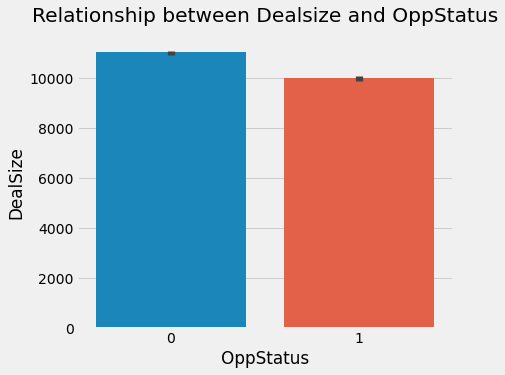

In [28]:
#This plot gave a visualization of the oppstatus and the dealsize
fig, ax = plt.subplots(figsize=(6,5))
plt.style.use('fivethirtyeight')

barplot = sns.barplot(df_train['OppStatus'], df_train['DealSize'], ax=ax) 
plt.title('Relationship between Dealsize and OppStatus', pad=15);

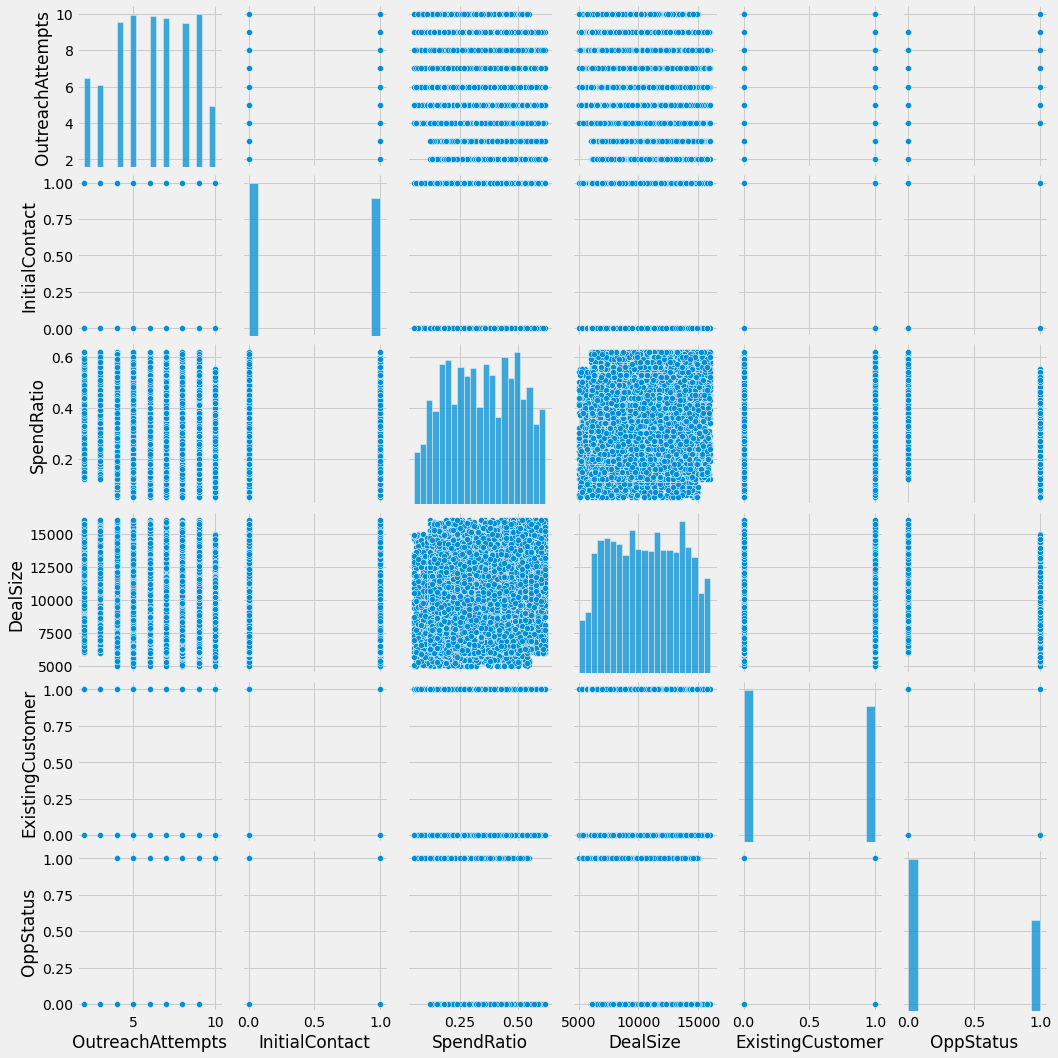

In [29]:
#this pairplot was done after the categorical features with yes or no have been converted
plt.style.use('fivethirtyeight')
sns.pairplot(df_train);

# <a id='4'> Analysis on Visualizations </a>

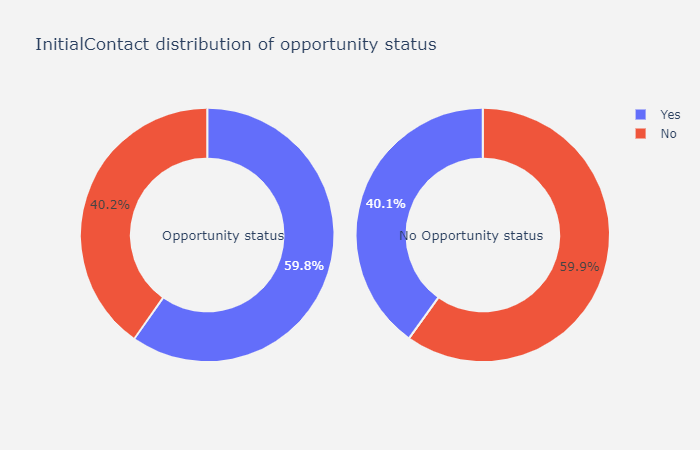

        From the diagram above:
    
                    InitialContact based on the distribution of opportunity status, having Opportunity Status 
                                * YES - is 59.8 %
                                *  NO - is 40.2 %  
            whereas;

                    Having No Opportunity Status:
                                * YES - is 59.9 %
                                *  NO - is 40.1 %

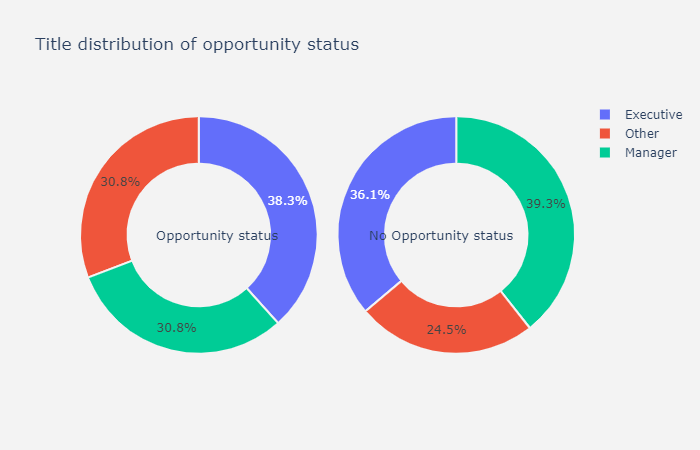

                From the diagram above:

                        Title based on the distribution of opportunity status, having Opportunity Status 
                                * EXPENSIVE - is 38.3 %
                                *   MANAGER - is 30.8 %
                                *     OTHER - is 30.8 %  
                whereas;

                        Having No Opportunity Status:
                                * EXPENSIVE - is 36.1 %
                                *   MANAGER - is 39.3 %
                                *     OTHER - is 24.5 %

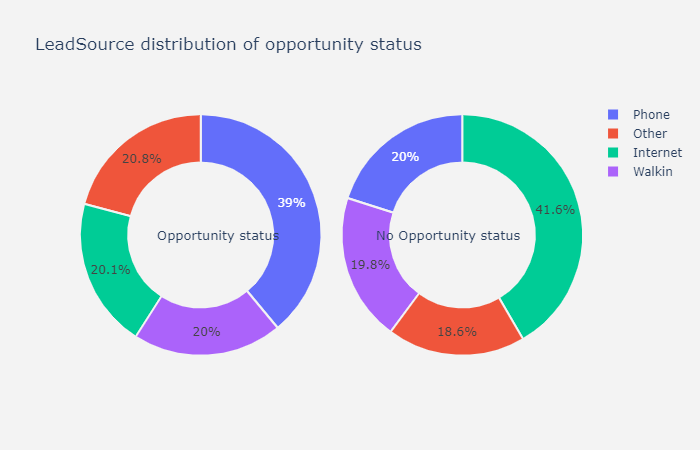

                From the diagram above:

                        Title based on the distribution of opportunity status, having Opportunity Status 
                                *    PHONE - is 39 %
                                * INTERNET - is 20.1 %
                                *  WALKING - is 20 % 
                                *    OTHER - is 20.8 %
                    whereas;

                        Having No Opportunity Status:
                                *    PHONE - is 20 %
                                * INTERNET - is 41.6 %
                                *  WALKING - is 19.8 % 
                                *    OTHER - is 18.6 %
                   
                   -This continues through the rest of the variable distributions on the dataset. 

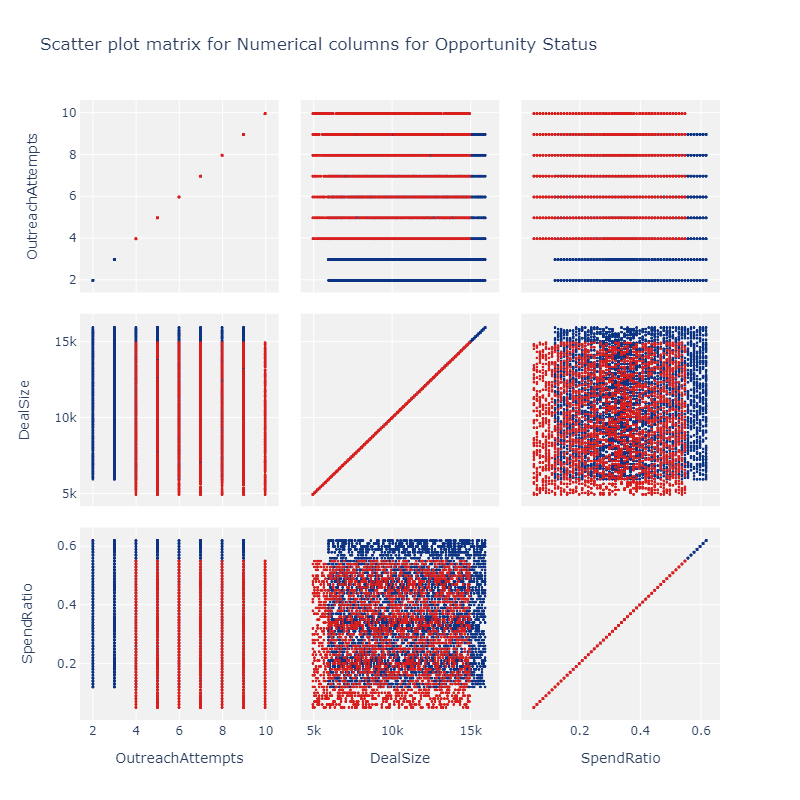

            From the diagram above:

              Scatter plot matrix for Numerical columns for Opportunity Status, 
                * There is a positive, strong, linear relationship between OutreachAttempts, DealSize, SpendRatio.
                * There is a positive, weak, non-linear relationship between DealSize & SpendRatio.
                * There is no associaiton between OutreachAttempts & SpendRatio, OutreachAttempts & DealSize.

# <a id='1'> Data preprocessing </a>

In [30]:
df_train.head()

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus,DealSize_group
0,9,0,Manager,0.47,8700,Internet,0,SE Asia,None,1,DealSize_5000-10000
1,8,1,Executive,0.35,10300,Internet,0,Europe,Trial,0,DealSize_10000-15000
2,8,1,Executive,0.17,6000,Phone,0,Other,"Digital,Traditional,Trial",1,DealSize_5000-10000
3,2,0,Manager,0.23,15200,Walkin,1,Americas,None,0,DealSize_above_15000
4,4,1,Other,0.34,8400,Phone,0,Other,"Digital,Trial",1,DealSize_5000-10000


In [31]:
#Binary columns with 2 values
#bin_cols   = df_train.nunique(axis=0)[df_train.nunique() == 2].keys().tolist() 
#simply means; give me the number of unique variable which is exactly 2 in all variable columns.eg 2 unique characters=[Yes, No]
# Example as nunique= number of unique; so here, variables or features with exactly 2 nuniques are:
# InitialContact, ExisitingCustomers, OppStatus and replace them with 0 and 1.
df_train.replace(('yes', 'no'), (1, 0), inplace=True) # -- two different strings 'yes'
df_train.replace(('Yes', 'No'), (1, 0), inplace=True) # and --                   'Yes'

In [32]:
# for Test Dataset
df_test.replace(('yes', 'no'), (1, 0), inplace=True)
df_test.replace(('Yes', 'No'), (1, 0), inplace=True)

In [33]:
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or 
# array.reshape(1, -1) if it contains a single sample.
df_train.drop('DealSize_group', axis='columns', inplace=True)
df_train.head()

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus
0,9,0,Manager,0.47,8700,Internet,0,SE Asia,None,1
1,8,1,Executive,0.35,10300,Internet,0,Europe,Trial,0
2,8,1,Executive,0.17,6000,Phone,0,Other,"Digital,Traditional,Trial",1
3,2,0,Manager,0.23,15200,Walkin,1,Americas,None,0
4,4,1,Other,0.34,8400,Phone,0,Other,"Digital,Trial",1


In [34]:
df_train.head()

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus
0,9,0,Manager,0.47,8700,Internet,0,SE Asia,None,1
1,8,1,Executive,0.35,10300,Internet,0,Europe,Trial,0
2,8,1,Executive,0.17,6000,Phone,0,Other,"Digital,Traditional,Trial",1
3,2,0,Manager,0.23,15200,Walkin,1,Americas,None,0
4,4,1,Other,0.34,8400,Phone,0,Other,"Digital,Trial",1


In [35]:
cat_cols = df_train[['Title', 'LeadSource', 'Region', 'CampaignMix']]
cat_cols_2 = df_test[['Title', 'LeadSource', 'Region', 'CampaignMix']]

In [36]:
# Since correlations deals with numeric data, we need to convert our catgorical variables/columns to numeric.

all_train_dummies = pd.get_dummies(cat_cols)
all_test_dummies = pd.get_dummies(cat_cols_2)

all_train_dummies.head()

,Title_Executive,Title_Manager,Title_Other,LeadSource_Internet,LeadSource_Other,LeadSource_Phone,LeadSource_Walkin,Region_Americas,Region_Australia,Region_Europe,Region_Other,Region_SE Asia,CampaignMix_Digital,"CampaignMix_Digital,Traditional","CampaignMix_Digital,Traditional,Trial","CampaignMix_Digital,Trial",CampaignMix_None,CampaignMix_Traditional,"CampaignMix_Traditional,Trial",CampaignMix_Trial
0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [37]:
all_test_dummies.head()

,Title_Executive,Title_Manager,Title_Other,LeadSource_Internet,LeadSource_Other,LeadSource_Phone,LeadSource_Walkin,Region_Americas,Region_Australia,Region_Europe,Region_Other,Region_SE Asia,CampaignMix_Digital,"CampaignMix_Digital,Traditional","CampaignMix_Digital,Traditional,Trial","CampaignMix_Digital,Trial",CampaignMix_None,CampaignMix_Traditional,"CampaignMix_Traditional,Trial",CampaignMix_Trial
0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [38]:
print(all_train_dummies.shape)
print(all_test_dummies.shape)

(7331, 20)
(7331, 20)


In [39]:
merged_all_train = pd.concat([df_train, all_train_dummies], axis='columns')
merged_all_test = pd.concat([df_test, all_test_dummies], axis='columns')

In [40]:
merged_all_train

,OutreachAttempts,InitialContact,Title,SpendRatio,DealSize,LeadSource,ExistingCustomer,Region,CampaignMix,OppStatus,Title_Executive,Title_Manager,Title_Other,LeadSource_Internet,LeadSource_Other,LeadSource_Phone,LeadSource_Walkin,Region_Americas,Region_Australia,Region_Europe,Region_Other,Region_SE Asia,CampaignMix_Digital,"CampaignMix_Digital,Traditional","CampaignMix_Digital,Traditional,Trial","CampaignMix_Digital,Trial",CampaignMix_None,CampaignMix_Traditional,"CampaignMix_Traditional,Trial",CampaignMix_Trial
0,9,0,Manager,0.47,8700,Internet,0,SE Asia,None,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,8,1,Executive,0.35,10300,Internet,0,Europe,Trial,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,8,1,Executive,0.17,6000,Phone,0,Other,"Digital,Traditional,Trial",1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2,0,Manager,0.23,15200,Walkin,1,Americas,None,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,4,1,Other,0.34,8400,Phone,0,Other,"Digital,Trial",1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,5,0,Manager,0.27,11300,Walkin,1,Other,None,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
7327,9,0,Manager,0.29,8900,Internet,1,Americas,None,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7328,5,0,Manager,0.57,9500,Other,0,Australia,None,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7329,5,0,Executive,0.18,14900,Internet,1,Europe,None,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [41]:
df_train_X = merged_all_train.drop(df_train[['Title', 'LeadSource', 'Region', 'CampaignMix', 'OppStatus']],axis = 1)
df_test = merged_all_test.drop(df_train[['Title', 'LeadSource', 'Region', 'CampaignMix', 'OppStatus']], axis = 1)

In [42]:
df_train_X

,OutreachAttempts,InitialContact,SpendRatio,DealSize,ExistingCustomer,Title_Executive,Title_Manager,Title_Other,LeadSource_Internet,LeadSource_Other,LeadSource_Phone,LeadSource_Walkin,Region_Americas,Region_Australia,Region_Europe,Region_Other,Region_SE Asia,CampaignMix_Digital,"CampaignMix_Digital,Traditional","CampaignMix_Digital,Traditional,Trial","CampaignMix_Digital,Trial",CampaignMix_None,CampaignMix_Traditional,"CampaignMix_Traditional,Trial",CampaignMix_Trial
0,9,0,0.47,8700,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,8,1,0.35,10300,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,8,1,0.17,6000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,2,0,0.23,15200,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,4,1,0.34,8400,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7326,5,0,0.27,11300,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
7327,9,0,0.29,8900,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
7328,5,0,0.57,9500,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7329,5,0,0.18,14900,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


# <a id='1'> Descriptive Statistics </a>

### Distribution Measures

* Kurtosis
* Skewness

In [43]:
print("Distribution measure on Kurtosis: \n\n", format(df_train_X.kurtosis())+"\n\n")
print("Distribution measure on the skewness: \n\n", format(df_train_X.skew())+"\n\n")
df_train_X.describe().T

Distribution measure on Kurtosis: 

 OutreachAttempts                         -1.018667
InitialContact                           -1.990489
SpendRatio                               -1.108500
DealSize                                 -1.141473
ExistingCustomer                         -1.987175
Title_Executive                          -1.708072
Title_Manager                            -1.667785
Title_Other                              -0.914280
LeadSource_Internet                      -1.513295
LeadSource_Other                          0.393739
LeadSource_Phone                         -0.943316
LeadSource_Walkin                         0.270916
Region_Americas                           0.373355
Region_Australia                         -0.505431
Region_Europe                            -0.935315
Region_Other                              2.290054
Region_SE Asia                            1.649662
CampaignMix_Digital                      23.034505
CampaignMix_Digital,Traditional          22.9

,count,mean,std,min,25%,50%,75%,max
OutreachAttempts,7331.0,6.085254,2.301779,2.00,4.00,6.00,8.00,10.00
InitialContact,7331.0,0.474969,0.499407,0.00,0.00,0.00,1.00,1.00
SpendRatio,7331.0,0.343975,0.152250,0.05,0.21,0.34,0.48,0.62
DealSize,7331.0,10617.514664,2950.506491,5000.00,8100.00,10600.00,13200.00,16000.00
ExistingCustomer,7331.0,0.471150,0.499201,0.00,0.00,0.00,1.00,1.00
Title_Executive,7331.0,0.369527,0.482710,0.00,0.00,0.00,1.00,1.00
Title_Manager,7331.0,0.361479,0.480462,0.00,0.00,0.00,1.00,1.00
Title_Other,7331.0,0.268995,0.443467,0.00,0.00,0.00,1.00,1.00
LeadSource_Internet,7331.0,0.335289,0.472123,0.00,0.00,0.00,1.00,1.00
LeadSource_Other,7331.0,0.194107,0.395539,0.00,0.00,0.00,0.00,1.00


## ResearchPy 

* It gives us the confidence interval of our variables

In [44]:
import researchpy as rp
rp.summary_cont(df_train_X)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,OutreachAttempts,7331.0,6.0853,2.3018,0.0269,6.0326,6.1380
1,InitialContact,7331.0,0.4750,0.4994,0.0058,0.4635,0.4864
2,SpendRatio,7331.0,0.3440,0.1523,0.0018,0.3405,0.3475
3,DealSize,7331.0,10617.5147,2950.5065,34.4600,10549.9632,10685.0661
4,ExistingCustomer,7331.0,0.4711,0.4992,0.0058,0.4597,0.4826
5,Title_Executive,7331.0,0.3695,0.4827,0.0056,0.3585,0.3806
6,Title_Manager,7331.0,0.3615,0.4805,0.0056,0.3505,0.3725
7,Title_Other,7331.0,0.2690,0.4435,0.0052,0.2588,0.2791
8,LeadSource_Internet,7331.0,0.3353,0.4721,0.0055,0.3245,0.3461
9,LeadSource_Other,7331.0,0.1941,0.3955,0.0046,0.1851,0.2032


In [45]:
import warnings
warnings.filterwarnings("ignore")

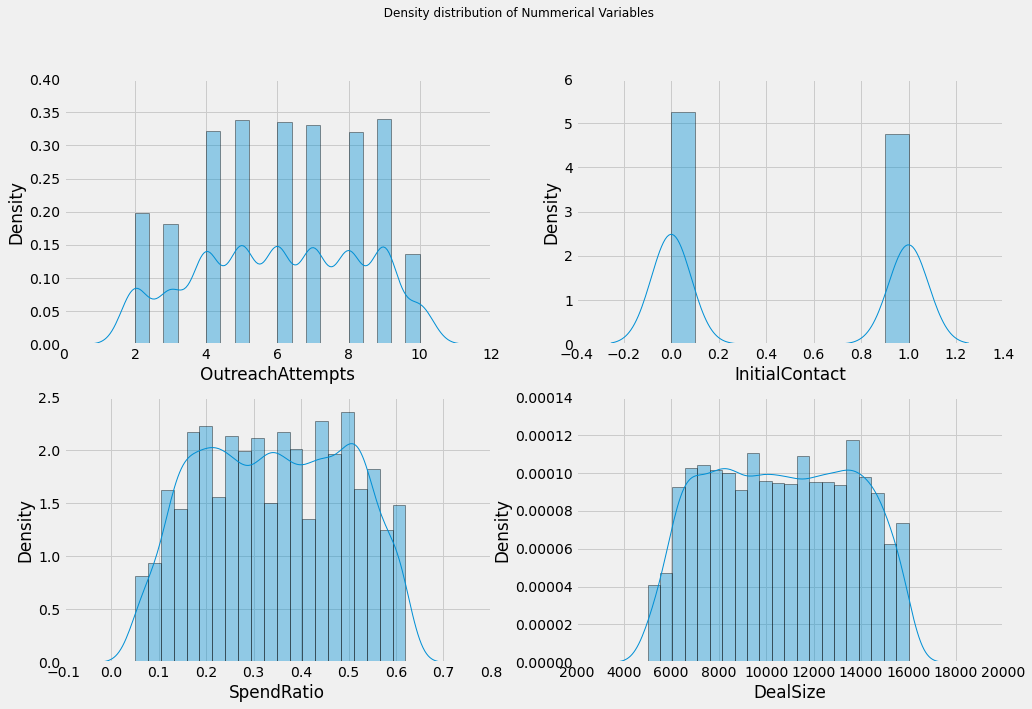

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.style.use('classic')

fig.suptitle('  Density distribution of Nummerical Variables ')

sns.distplot(df_train_X['OutreachAttempts'], ax=axes[0, 0])
sns.distplot(df_train_X['InitialContact'], ax=axes[0, 1])
sns.distplot(df_train_X['SpendRatio'], ax=axes[1, 0])
sns.distplot(df_train_X['DealSize'], ax=axes[1, 1])

plt.show();

In [47]:
plt.style.use('default')

# <a id='1'> Preparing the data for modelling </a>

In [48]:
df_train_X.sample(5)

,OutreachAttempts,InitialContact,SpendRatio,DealSize,ExistingCustomer,Title_Executive,Title_Manager,Title_Other,LeadSource_Internet,LeadSource_Other,LeadSource_Phone,LeadSource_Walkin,Region_Americas,Region_Australia,Region_Europe,Region_Other,Region_SE Asia,CampaignMix_Digital,"CampaignMix_Digital,Traditional","CampaignMix_Digital,Traditional,Trial","CampaignMix_Digital,Trial",CampaignMix_None,CampaignMix_Traditional,"CampaignMix_Traditional,Trial",CampaignMix_Trial
689,4,1,0.61,10300,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
253,5,0,0.51,13200,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
276,9,0,0.20,7400,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
588,5,0,0.26,8400,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5459,7,0,0.56,11800,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [49]:
df_train_Y = df_train.iloc[:, -1]
df_train_Y.head()

0    1
1    0
2    1
3    0
4    1
Name: OppStatus, dtype: int64

## changing the data to numpy arrays

In [50]:
df_train_X.values

array([[9.  , 0.  , 0.47, ..., 0.  , 0.  , 0.  ],
       [8.  , 1.  , 0.35, ..., 0.  , 0.  , 1.  ],
       [8.  , 1.  , 0.17, ..., 0.  , 0.  , 0.  ],
       ...,
       [5.  , 0.  , 0.57, ..., 0.  , 0.  , 0.  ],
       [5.  , 0.  , 0.18, ..., 0.  , 0.  , 0.  ],
       [2.  , 1.  , 0.33, ..., 0.  , 0.  , 0.  ]])

In [51]:
df_train_Y.values

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

## splitting the data

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_train_X.values, df_train_Y.values, test_size=0.25, random_state = 100, shuffle = True)

Due to the nature of DealSize having huge number, there is the need to scale the data.

## Scaling the data

In [53]:
#Scaling Numerical columns
from sklearn.preprocessing import StandardScaler
stnd_Scaler = StandardScaler()
X_train_Sc = stnd_Scaler.fit_transform(X_train)

# for X_test = df_test
X_test_Sc  = stnd_Scaler.transform(X_test)

In [54]:
X_train_Sc

array([[-0.48501816,  1.04312627, -1.80166478, ..., -0.19479735,
        -0.33036131, -0.34109409],
       [-0.05057211, -0.95865671,  1.08460683, ..., -0.19479735,
         3.02698889, -0.34109409],
       [ 1.25276603, -0.95865671, -0.16173773, ..., -0.19479735,
        -0.33036131, -0.34109409],
       ...,
       [-0.05057211,  1.04312627, -0.81770855, ..., -0.19479735,
        -0.33036131, -0.34109409],
       [-0.91946421, -0.95865671,  1.01900975, ..., -0.19479735,
        -0.33036131, -0.34109409],
       [ 0.81831998,  1.04312627,  0.95341266, ..., -0.19479735,
        -0.33036131, -0.34109409]])

In [55]:
X_test_Sc

array([[ 1.25276603, -0.95865671, -1.21129104, ..., -0.19479735,
        -0.33036131, -0.34109409],
       [-0.91946421, -0.95865671, -0.94890271, ..., -0.19479735,
        -0.33036131, -0.34109409],
       [ 0.38387394, -0.95865671, -1.34248521, ..., -0.19479735,
        -0.33036131, -0.34109409],
       ...,
       [-0.05057211, -0.95865671, -0.68651439, ..., -0.19479735,
        -0.33036131, -0.34109409],
       [ 0.81831998,  1.04312627, -1.14569396, ..., -0.19479735,
         3.02698889, -0.34109409],
       [-0.91946421, -0.95865671,  0.03505352, ..., -0.19479735,
        -0.33036131, -0.34109409]])

# <a id='1'> ML - Modelling </a>

# Instantiating the models

### Testing Different Models
I will be testing the following models with my training data (got the list from here):

* Gaussian Naive Bayes
* Logistic Regression
* Support Vector Machines
* Linear Support Vector Classifier
* Perceptron
* Decision Tree Classifier
* Random Forest Classifier
* KNN or k-Nearest Neighbors
* XGBoost Classifier

### Gaussian Naive Bayes

In [56]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train_Sc, y_train)     # (x_train, y_train)

# Predict
y_pred_Sc = gaussian.predict(X_test_Sc)

# Score
acc_gaussian = round(accuracy_score(y_pred_Sc, y_test) * 100, 2)
print(acc_gaussian)

88.93


In [57]:
print("Comparing our Training score vrs Test score of Gaussian Naive Bayes:", gaussian.score(X_train_Sc, y_train))

Comparing our Training score vrs Test score of Gaussian Naive Bayes: 0.901964350672972


In [58]:
# Using the r2_score to check model performance
r2_score(y_test, y_pred_Sc)# Gaussian Naive Bayes model

0.523365527488856

**The Gaussian Naive Bayes model performs badly after scaling the data with the Standard Scaler.The Gaussian Naive Bayes model performs very poorly whilst the random forest remain unchaged. This implies that Gaussian Naive Bayes model/ other model with same result is sensitive to scaling than the random forest. The Gaussian Naive Bayes model even gave a quite a balanced score of 52.34 % indicating a somewhat good performance. This could be due to fact that most of the variables are binaries of zeros and ones. Kindly note that scaling will not always yield a better results.**

In [59]:
import warnings
warnings.filterwarnings("ignore")

### Logistic Regression

In [60]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_Sc, y_train)

# Predict
y_pred_Sc = logreg.predict(X_test_Sc)

# Score
acc_logreg = round(accuracy_score(y_pred_Sc, y_test) * 100, 2)
print(acc_logreg)

90.89


### Support Vector Machines

In [61]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train_Sc, y_train)

# Predict
y_pred_Sc = svc.predict(X_test_Sc)

# Score
acc_svc = round(accuracy_score(y_pred_Sc, y_test) * 100, 2)
print(acc_svc)

91.0


### Linear SVC (Support Vector Classifier)

In [62]:
# Linear SVC
linear_svc = LinearSVC()                 
linear_svc.fit(X_train_Sc, y_train)

# Predict
y_pred_Sc = linear_svc.predict(X_test_Sc)

# Score
acc_linear_svc = round(accuracy_score(y_pred_Sc, y_test) * 100, 2)
print(acc_linear_svc)

90.89


### Perceptron

In [63]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train_Sc, y_train)

# Predict
y_pred_Sc = perceptron.predict(X_test_Sc)

# Score
acc_perceptron = round(accuracy_score(y_pred_Sc, y_test) * 100, 2)
print(acc_perceptron)

86.63


### Decision Tree Classifier

In [64]:
# Decision Tree Classifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_Sc, y_train)

# Predict
y_pred_Sc = decisiontree.predict(X_test_Sc)

# Score
acc_decisiontree = round(accuracy_score(y_pred_Sc, y_test) * 100, 2)
print(acc_decisiontree)

89.63


### Random Forest Classifier

In [65]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train_Sc, y_train)

# Predict
y_pred_Sc = randomforest.predict(X_test_Sc)

# Score
acc_randomforest = round(accuracy_score(y_pred_Sc, y_test) * 100, 2)
print(acc_randomforest)

93.67


### KNN or k-Nearest Neighbors

In [66]:
# KNN or k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_Sc, y_train)

# Predict
y_pred_Sc = knn.predict(X_test_Sc)

# Score
acc_knn = round(accuracy_score(y_pred_Sc, y_test) * 100, 2)
print(acc_knn)

90.4


### XGBoost - eXtended Gradient Boost

In [67]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train_Sc, y_train)

# Predict
y_pred_Sc = xgb.predict(X_test_Sc)

# Score
acc_xgb = round(accuracy_score(y_pred_Sc, y_test) * 100, 2)
print(acc_xgb)

[23:47:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
93.02


In [68]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC',
              'Decision Tree', 'XGBoost'],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_randomforest, acc_gaussian, acc_perceptron, 
              acc_linear_svc, acc_decisiontree, acc_xgb] 
                       })

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.67
8,XGBoost,93.02
0,Support Vector Machines,91.00
2,Logistic Regression,90.89
6,Linear SVC,90.89
1,KNN,90.40
7,Decision Tree,89.63
4,Naive Bayes,88.93
5,Perceptron,86.63


# <a id='1'> Evaluating estimator performance </a>

## Cross Validation

The accuracy actually highly depends on the splitting of the training set (we can try different seperation percentage, then results change a lot). To avoid that, we will use cross validation. Here, K-fold cross validation is used.

In [69]:
X = df_train_X.values #--- transformed TRAINING DATASET
Y = df_train_Y.values

kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Support Vector Machines', 'K-Nearst Neighbor', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'XGBoost']
models=[SVC(), KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier(), GaussianNB(), 
        Perceptron(), LinearSVC(), DecisionTreeClassifier(), XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result )
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

[23:47:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,CV Mean,Std
Support Vector Machines,0.598840,0.290980
K-Nearst Neighbor,0.793346,0.140160
Logistic Regression,0.913655,0.013750
Random Forest,0.934796,0.009011
Naive Bayes,0.898785,0.040296
Perceptron,0.639905,0.318867
Linear SVC,0.561460,0.342556
Decision Tree,0.899194,0.031673
XGBoost,0.931658,0.013311


# <a id='1'> Confusion Matrix </a>

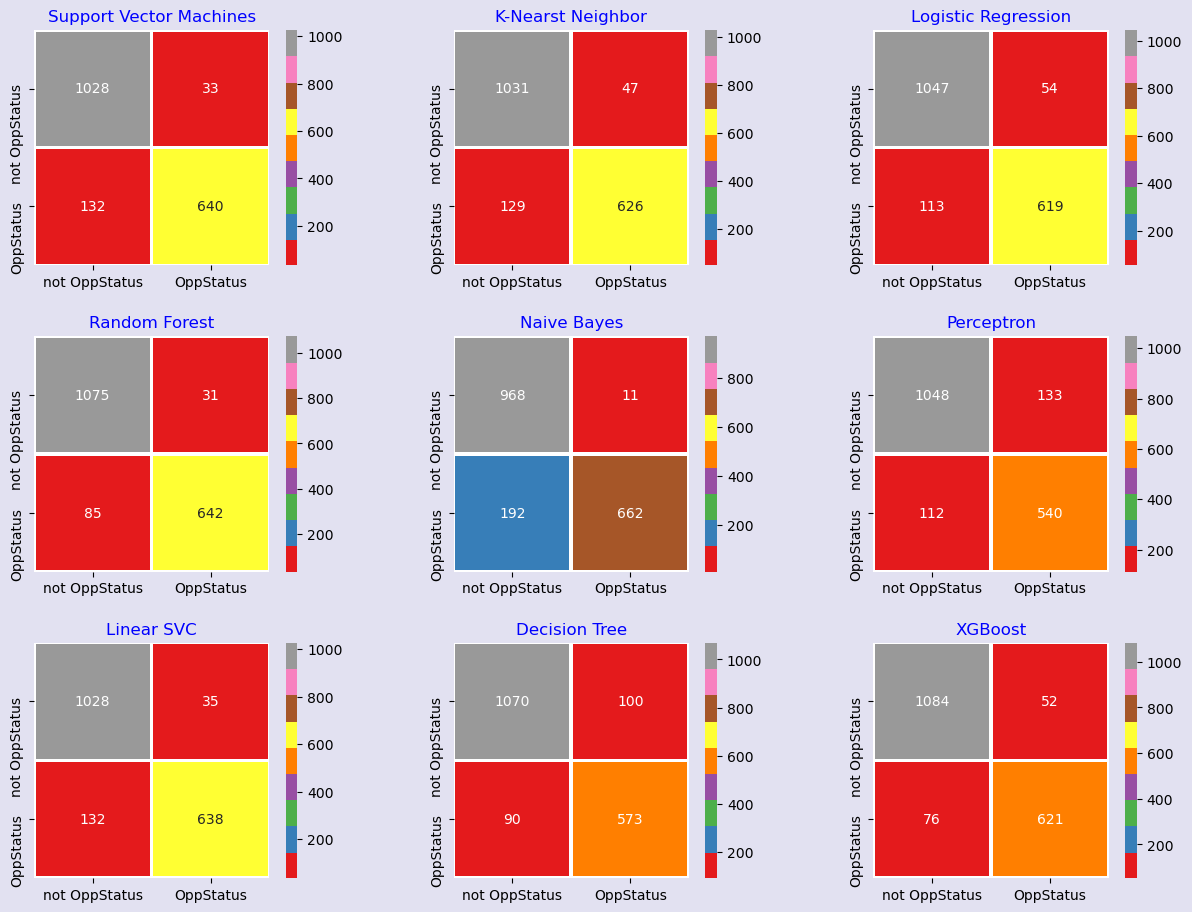

In [70]:
models=[svc, knn, logreg, randomforest, gaussian, 
        perceptron, linear_svc, decisiontree, xgb]


length = len(models)


classifiers=['Support Vector Machines', 'K-Nearst Neighbor', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'XGBoost']


fig = plt.figure(figsize=(15,15))
fig.set_facecolor("#E2E1F1")  # "#F3F3F3"
for m,l,c in itertools.zip_longest(models,range(length), classifiers) :
    plt.subplot(4,3, l+1)
    predictions = m.predict(X_test_Sc)
    conf_matrix = confusion_matrix(predictions, y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["not OppStatus","OppStatus"],
                yticklabels=["not OppStatus","OppStatus"],
                linewidths = 2,linecolor = "w",cmap = "Set1")
    plt.title(c,color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)